#Subplots

Sometimes it is useful to show several complex plots side by side for viewers to compare.

In [ ]:
#setting the rendering backend and packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.

In [ ]:
plt.subplot?

There are three mandatory parameters for the `plt.subplot()` function.
- nrows: number of rows
- ncols: number of columns
- index: indicating which subplot are we working on, *index* starts at 1 in the upper left corner and increases to the right.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


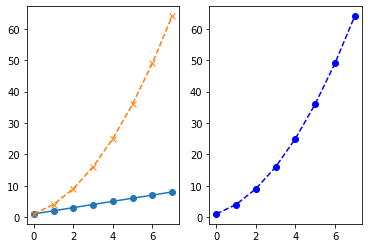

In [ ]:
plt.figure()

#plotting the first subplot
plt.subplot(1,2,1)
linear_data = np.arange(1,9)
plt.plot(linear_data, '-o')

#plotting the second subplot
plt.subplot(1,2,2)
exponential_data = linear_data ** 2
plt.plot(exponential_data,'--ob')

#overlay exponential line on the linear line
plt.subplot(1,2,1) #we can always revisit the subplot that we have modified
plt.plot(exponential_data, '--x')

We can see that a potential problem of subplot is that the axis of each plot can differ from each other, making the figure quite missleading to readers. Luckily, we can lock the axes by calling `sharex` or `sharey`.

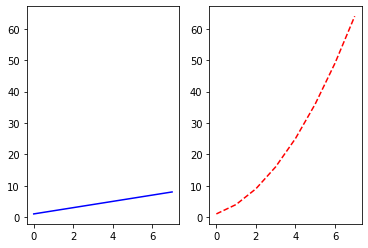

In [ ]:
plt.figure()

ax1 = plt.subplot(1,2,1) #can also coded as plt.subplot(121)
plt.plot(linear_data, '-b')

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.plot(exponential_data, '--r')

#remember that pyplot will get the current axis underneath, so a call to pyplot 
#will transparently work with the LAST axis object that we are using.

**REMEMBER**:  
For subplot objects, the **index** starts at ONE not ZERO!

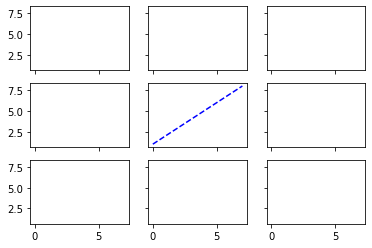

In [ ]:
#create a grid and lock all axes
fig, axes = plt.subplots(3,3,sharex=True,sharey=True)

axes[1,1].plot(linear_data, '--b') #here axes is an array and index starts at ZERO not ONE

#turn on tick label for each subplot
for ax in axes.flatten():
    for tk in ax.get_yticklabels():
        tk.set_visible(True)
    for tk in ax.get_xticklabels():
        tk.set_visible(True)

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a74b7c2e8>,
      dtype=object)

In [ ]:
axes.shape

(3, 3)

In [ ]:
type(fig)

matplotlib.figure.Figure

#Histogram

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

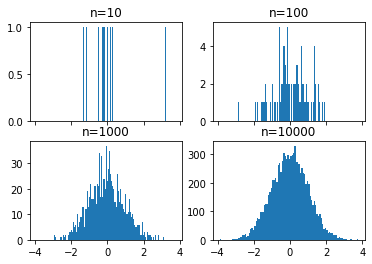

In [ ]:
#create four different histograms based on samples from normal distribution
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,        #2*2, ((1,2), (3,4))
                                           sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
  sample_size = 10**(n+1)
  sample = np.random.randn(sample_size)
  axs[n].hist(sample, bins=100) #tricky to decide the propriate bin numbers
  axs[n].set_title('n={}'.format(sample_size))
 

Now let's look into the `GridSpec` layout for subplots.

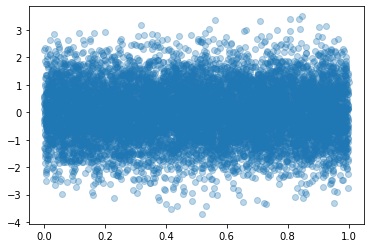

In [ ]:
plt.figure()
Y = np.random.randn(10000)
X = np.random.random(10000)
plt.scatter(X, Y, alpha=0.3)

It's unclear to identify the distribution of each axis, but we could add two smaller plots for each axis to make the distribution more discernible. 

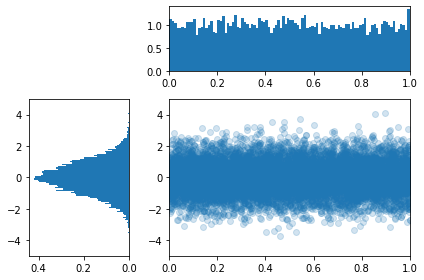

In [ ]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3) #This is a LIST and the index start at ZERO!

plot_x = plt.subplot(gspec[0, 1:])
plot_y = plt.subplot(gspec[1:, 0])
scat = plt.subplot(gspec[1:, 1:])

Y = np.random.randn(10000)
X = np.random.random(10000)

scat.scatter(X, Y, alpha=0.2)
plot_x.hist(X, bins=100, density=True)
p_y = plot_y.hist(Y, bins=100, orientation='horizontal', density=True)

#flip the left-side figure
plot_y.invert_xaxis()

#align the y-axes for the small hists
for ax in [plot_x, scat]:
    ax.set_xlim(0, 1)
for ax in [plot_y, scat]:
    ax.set_ylim(-5, 5)

#avoid overlap of plots
plt.tight_layout()

#Boxplot

A boxplot simultaneity means the following aggregate information of a dataset:
- mean
- min and max
- interquartile range (variability of the data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
normal_sample = np.random.randn(10000)
random_sample = np.random.random(10000)
gamma_sample = np.random.gamma(2, size=10000)

#wrap them in a df
df = pd.DataFrame({'normal':normal_sample,
                   'random':random_sample,
                   'gamma':gamma_sample})

In [ ]:
#use pandas describe function to see some summary statistics
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.015157,0.499085,2.008900
std,0.993177,0.289828,1.412176
min,-3.786689,0.000131,0.004844
25%,-0.678009,0.247235,0.963590
50%,-0.002067,0.494373,1.715338
75%,0.639754,0.752997,2.709747
max,4.483033,0.999835,10.628156


[Text(0, 0, 'normal')]

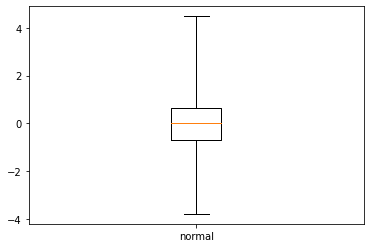

In [ ]:
plt.figure()
plt.boxplot(df['normal'],
            whis=(0,100)) #indicating the whiskers showing the min and max values
plt.gca().set_xticklabels(['normal'])

we cannot put a pandas dataframe directly into the `boxplot` method, but to pull out each column and send them in as a **list of columns**.

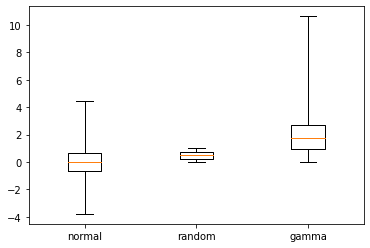

In [ ]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']],
            whis=(0,100))
_ = plt.gca().set_xticklabels(df.columns.to_list())

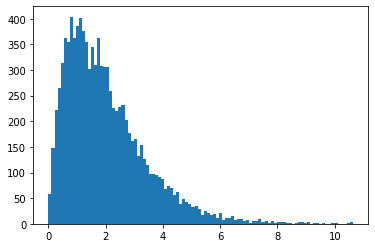

In [ ]:
#take a deeper look into the gamma distribution
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

We can add this distribution plot into our boxplot with the help of **inset axes** and to do so, we need to import axes grid from the toolkits of matplotlib.

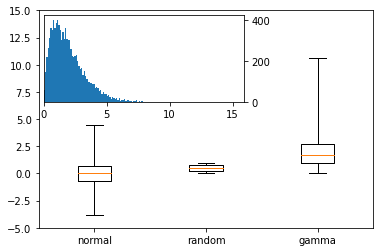

In [ ]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']],
            whis=(0,100))
plt.gca().set_xticklabels(df.columns.to_list())
plt.gca().set_ylim(-5,15) #only affect the LATEST axis object

#create inset axes - subplot inside the boxplot
ax2 = mpl_il.inset_axes(plt.gca(),
                        width='60%', height='40%',
                        loc=2) #only 10 pre-set locations


ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
ax2.set_xlim(left=0)

ax2.yaxis.tick_right()



If we don't pass value to the `whis` parameter, the whiskers will only cover the $1.5 * IQR$ range. Data points that are not in that range are called **outliners**.

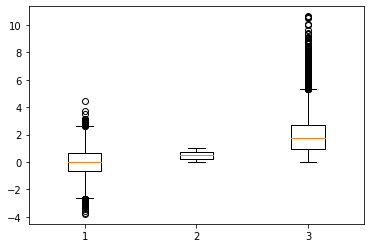

In [ ]:
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

More about `boxplot` on [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot)

#Heatmap

Heatmap is useful to display certain **three dimentional data**. There are the x-axis, y-axis and the **color**.

**Using a heatmap for categorical data is just plain wrong.** It misleads the viewer into looking for patterns and ordering through spatial proximity. And any such patterns would be purely spurious.

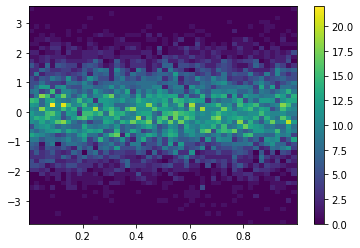

In [ ]:
plt.figure()

Y = np.random.randn(10000)
X = np.random.random(10000)

plt.hist2d(X,Y, bins=50)
_ = plt.colorbar() # add a legend

#Animation

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#cannot work in google colab
%matplotlib notebook

In [18]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [20]:
def update(curr):
  # check if animation is at the last frame, and if so, stop the animation a
  if curr == n:
    a.event_source.stop()
  plt.cla()
  bins = np.arange(-4, 4, 0.5)
  #fix bins for each redrawing and ensure these are set and evenly spaced
  plt.hist(x[:curr], bins=bins)
  #avoid the autoscale of axes
  plt.axis([-4,4,0,30])
  plt.gca().set_title('Sampling the Normal Distribution')
  plt.gca().set_ylabel('Frequency')
  plt.gca().set_xlabel('Value')
  #insert annotation to the chart showing how many samples are currently being
  #rendered to the screen.
  plt.annotate('n = { }'.format(curr),[3,27])

In [ ]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

#Interactivity

For interactivity though, we have to head down to the **artist layer** a bit more. In particular, we have to **reference the canvas object** of the current figure. The canvas object handles all of the **drawing events** and it's tightly connected with a given back end.  
*Moving a mouse pointer* for instance would create an event, *clicking* will create an event, *pressing on keys on the keyboard* would create an event. And this didn't only happen at the hardware level such as IRQ interrupts but **at the software level as well**. In fact, event driven programming has infiltrated most of the ways computer programmers regularly engage with software. From HTML and JavaScript, down to lower level C code.  
You can think of an **event as a piece of data which is associated with a function call**. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data.

In [21]:
%matplotlib notebook
plt.figure()
data = np.random.randn(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

Among all kinds of events, maybe the most important one is **pick event**. This allows the program to respond when users actually **click on a visual element** of the figure.

In [22]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.137828,0.935816,China
1,0.400796,0.839715,India
2,0.890540,0.214019,Germany
3,0.341964,0.521232,Mexico
4,0.482066,0.286252,Canada
5,0.408741,0.199877,UK
6,0.163718,0.205622,Iraq
7,0.203561,0.378752,Chile
8,0.171284,0.849614,Brazil
9,0.631970,0.006327,USA


In [ ]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

#add pick event and wire up
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)